## Imbalanced Classification

There are a few things to consider, when working with a dataset where the classification variable is highly imbalanced.
Oversampling the minority and undersampling the majority class a effective ways to deal with a imbalanced classifications. But simply duplicating rows in the oversampling part, does not add any value to the dataset.

It would be more effective to synthesize new examples from the known ones. This is where we can a data augmentation method like SMOTE.

> Synthetic Minority Oversampling Technique


https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/


Problem with imbalanced classifications: 
- there are too few examples of the minority class in a model to effectively learn the decision boundary.

#### How SMOTE works:
> a random sample from the minority class is chosen. Than  k of the nearest neighbors for that example are found (k=5). A randomly selected neighbor is chosen and a synthetic example is created at a randomly selected point between the two examples in the feature space.

#### Downside
> synthetic examples are created without considering the majority class,possibly resulting in ambiguous examples if there is a strong overlap of the classes.

In [1]:
# used for oversampling minority
from imblearn.over_sampling import SMOTE
# used for downsampling majority
from imblearn.under_sampling import RandomUnderSampler
# import pipeline to chain these two transformations
from imblearn.pipeline import Pipeline

# this generates a random n-class classification problem 
from sklearn.datasets import make_classification

# we can use the Counter subclass to check the number of classes in the dataset 
from collections import Counter

import matplotlib.pyplot as plt
import numpy as np

In [15]:
# now create an imbalanced DataSet
X, y = make_classification(n_samples=10000,
                           n_features=2,
                           n_redundant=0,
                           n_clusters_per_class=1,
                           weights=[0.99],
                           flip_y=0,
                           random_state=1)

In [3]:
X.shape

(10000, 2)

In [4]:
y.shape

(10000,)

In [5]:
counter = Counter(y)

In [6]:
print(counter)

Counter({0: 9900, 1: 100})


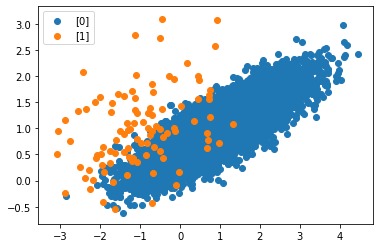

In [7]:
# creat scatterplot from data
for label, _ in counter.items():
    row_ix =np.where(y == label)[0]
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str([label]))
plt.legend();

#### Oversampling with SMOTE
> SMOTE acts like a data transformer object from scikit-learn 

In [8]:
oversample = SMOTE()

In [9]:
X, y = oversample.fit_resample(X, y)

In [10]:
counter = Counter(y)
print(counter)

Counter({0: 9900, 1: 9900})


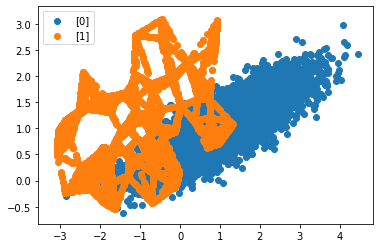

In [11]:
# creat scatterplot from data
for label, _ in counter.items():
    row_ix =np.where(y == label)[0]
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str([label]))
plt.legend();

We can clearly see the that data points are randomly generated between points

#### Combine SMOTE oversampling with random undersampling of majority class
1. oversample the minority class with SMOTE to have 10% of the majority class (1000)
2. use random undersampling to reduce the number in the majority class to have 50% more than the minority class

In [16]:
# define over and undersampling
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)

In [17]:
# define pipeline 
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

In [18]:
# transform the dataset
X, y = pipeline.fit_resample(X, y)

In [20]:
counter = Counter(y)
print(counter)

Counter({0: 1980, 1: 990})


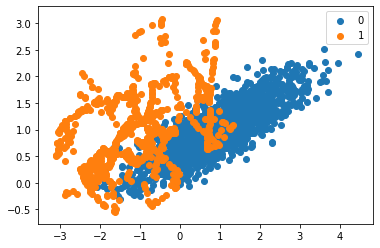

In [23]:
for label, _ in counter.items():
    row_ix = np.where(y == label)[0]
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
plt.legend()
plt.show()

> now the data is more balanced, which leads to a better predictive model 